In [3]:
!pip install holidays

  Using cached convertdate-2.3.2-py3-none-any.whl (47 kB)
  Using cached korean_lunar_calendar-0.2.1-py3-none-any.whl (8.0 kB)
  Using cached PyMeeus-0.5.11-py3-none-any.whl


In [1]:
import os
import pandas as pd
import numpy as np

In [6]:
import calendar
from datetime import datetime, date, timedelta
import holidays
import pickle
#from prophet import Prophet

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates

%matplotlib inline
sns.set(style='darkgrid')
#sns.color_palette()

### Dataset:

In [10]:
df_faturamento = pd.read_csv("../datasets/dataset1.csv", sep="|")
df_faturamento.head()

,Unnamed: 0,duedate,paymentmode,_c2,Unnamed: 4
0,NaN,2017-10-01,Auto Atendimento,1,NaN
1,NaN,2017-10-01,Internet Banking,1,NaN
2,NaN,2017-10-01,Outros Meios c/ Fatura,1,NaN
3,NaN,2017-12-01,Auto Atendimento,1,NaN
4,NaN,2017-12-01,Internet Banking,1,NaN


In [11]:
df_faturamento.columns

Index(['Unnamed: 0', 'duedate', 'paymentmode', '_c2', 'Unnamed: 4'], dtype='object')

In [16]:
df_faturamento = df_faturamento[['duedate', 'paymentmode', '_c2']]
df_faturamento.columns = ['vencimento', 'pagamento', 'total']
df_faturamento.tail()

,vencimento,pagamento,total
406,2022-04-01,Outros Meios c/ Fatura,600368
407,2022-04-01,PIX,54519
408,2022-04-01,NULL,1464
409,2022-05-01,NULL,6
410,2022-07-01,NULL,42


In [17]:
df_faturamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   vencimento  411 non-null    object
 1   pagamento   411 non-null    object
 2   total       411 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.8+ KB


### Clean dataframe

In [18]:
df_faturamento['vencimento'] = df_faturamento['vencimento'].apply(lambda x: str(x).strip())
df_faturamento['vencimento'].unique()

C:\Users\crist\anaconda3\envs\odsvivonext\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array(['2017-10-01', '2017-12-01', '2018-01-01', '2018-02-01',
       '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
       '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
       '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01',
       '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
       '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
       '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
       '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
       '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
       '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
       '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
       '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
       '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
       '2022-03-01', '2022-04-01', '2022-05-01', '2022-07-01'],
      dtype=object)

In [19]:
df_faturamento['vencimento'].value_counts()

2022-02-01    11
2022-03-01    11
2021-11-01    11
2022-01-01    11
2021-08-01    10
2021-10-01    10
2022-04-01    10
2021-12-01    10
2021-09-01    10
2021-06-01     9
2021-03-01     9
2021-07-01     9
2020-10-01     9
2020-08-01     8
2021-04-01     8
2020-06-01     8
2019-05-01     8
2020-05-01     8
2020-12-01     8
2020-04-01     8
2019-11-01     8
2019-09-01     8
2020-02-01     8
2019-12-01     8
2020-03-01     8
2020-09-01     8
2019-10-01     8
2020-11-01     8
2021-05-01     8
2020-01-01     8
2020-07-01     8
2021-01-01     8
2021-02-01     8
2018-09-01     7
2019-01-01     7
2019-08-01     7
2018-11-01     7
2019-04-01     7
2018-10-01     7
2018-07-01     7
2018-08-01     7
2018-12-01     7
2019-02-01     7
2019-03-01     7
2019-07-01     7
2019-06-01     7
2018-06-01     6
2018-05-01     4
2018-04-01     4
2017-10-01     3
2018-03-01     3
2018-02-01     3
2017-12-01     3
2018-01-01     2
2022-07-01     1
2022-05-01     1
Name: vencimento, dtype: int64

In [20]:
df_faturamento['pagamento'] = df_faturamento['pagamento'].apply(lambda x: str(x).strip())
df_faturamento['pagamento'].unique()

C:\Users\crist\anaconda3\envs\odsvivonext\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array(['Auto Atendimento', 'Internet Banking', 'Outros Meios c/ Fatura',
       'Guiche de Caixa c/ Fatura', 'Cartão de Crédito', 'NULL',
       'Débito Automático', 'Correspondente Bancário',
       'Guiche de Caixa s/ Fatura', 'PIX', 'CC_NA',
       'Cartão de Crédito - Não autorizado'], dtype=object)

In [21]:
df_faturamento['pagamento'] = df_faturamento['pagamento'].apply(lambda x: "Vazio" if x == "NULL" else x)

C:\Users\crist\anaconda3\envs\odsvivonext\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_faturamento['pagamento'].value_counts()

Auto Atendimento                      54
Internet Banking                      54
Outros Meios c/ Fatura                53
Guiche de Caixa c/ Fatura             49
Vazio                                 49
Cartão de Crédito                     47
Correspondente Bancário               45
Débito Automático                     34
CC_NA                                  8
PIX                                    8
Guiche de Caixa s/ Fatura              7
Cartão de Crédito - Não autorizado     3
Name: pagamento, dtype: int64

In [23]:
df_faturamento['total'] = df_faturamento['total'].apply(lambda x: str(x).strip())
df_faturamento['total'].unique()

C:\Users\crist\anaconda3\envs\odsvivonext\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array(['1', '4', '5', '11', '2', '9', '7', '15', '10', '8', '13', '16',
       '14', '26', '23', '6', '35', '56', '39', '3', '51', '64', '71',
       '105', '146', '84', '21', '18', '115', '175', '126', '22', '29',
       '222', '303', '134', '34', '30', '164', '284', '207', '86', '58',
       '341', '516', '209', '28', '54', '300', '423', '223', '32', '60',
       '307', '449', '331', '167', '92', '475', '751', '244', '127', '85',
       '330', '527', '316', '48', '156', '112', '488', '705', '358', '47',
       '182', '550', '717', '985', '43', '159', '110', '2705', '821',
       '371', '45', '119', '555', '754', '493', '197', '140', '708',
       '1020', '302', '658', '82', '317', '12', '198', '945', '1358',
       '734', '116', '327', '215', '999', '1489', '299', '695', '111',
       '364', '233', '1078', '1629', '236', '975', '120', '463', '20',
       '310', '1392', '2176', '766', '132', '363', '249', '1177', '1815',
       '273', '820', '87', '375', '248', '1206', '1904', '337', 

In [24]:
df_faturamento['total'].value_counts()

1         21
4          8
2          7
3          5
7          4
          ..
249        1
753704     1
124        1
527        1
3191       1
Name: total, Length: 334, dtype: int64

In [26]:
df_faturamento['total'] = df_faturamento['total'].astype('int64')
df_faturamento['vencimento'] = pd.to_datetime(df_faturamento['vencimento'])

df_faturamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   vencimento  411 non-null    datetime64[ns]
 1   pagamento   411 non-null    object        
 2   total       411 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 9.8+ KB


C:\Users\crist\anaconda3\envs\odsvivonext\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\crist\anaconda3\envs\odsvivonext\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
df_2021 = df_faturamento[(df_faturamento['vencimento'] >= datetime(2021, 1, 1)) & (df_faturamento['vencimento'] < datetime(2022, 1, 1))]
df_2021 = df_2021.groupby(['vencimento', 'pagamento'], as_index=False).agg({"total": "sum"})
df_2021.head()

,vencimento,pagamento,total
0,2021-01-01,Auto Atendimento,10655
1,2021-01-01,Cartão de Crédito,589
2,2021-01-01,Correspondente Bancário,3191
3,2021-01-01,Débito Automático,900
4,2021-01-01,Guiche de Caixa c/ Fatura,2700


In [40]:
df_2021

,vencimento,pagamento,total
0,2021-01-01,Auto Atendimento,10655
1,2021-01-01,Cartão de Crédito,589
2,2021-01-01,Correspondente Bancário,3191
3,2021-01-01,Débito Automático,900
4,2021-01-01,Guiche de Caixa c/ Fatura,2700
...,...,...,...
105,2021-12-01,Guiche de Caixa c/ Fatura,584558
106,2021-12-01,Internet Banking,7869379
107,2021-12-01,Outros Meios c/ Fatura,7151230
108,2021-12-01,PIX,49329


In [29]:
df_2021.groupby(['pagamento'], as_index=False).agg({"total": "sum"}).set_index('total').sort_index(ascending=False)

,pagamento
total,
52814151,Internet Banking
51728799,Outros Meios c/ Fatura
29162935,Auto Atendimento
20489969,Débito Automático
4046688,Guiche de Caixa c/ Fatura
3318503,Correspondente Bancário
2907931,Vazio
892634,Cartão de Crédito
53220,PIX


### Show Plots

In [30]:
df_2021.head()

,vencimento,pagamento,total
0,2021-01-01,Auto Atendimento,10655
1,2021-01-01,Cartão de Crédito,589
2,2021-01-01,Correspondente Bancário,3191
3,2021-01-01,Débito Automático,900
4,2021-01-01,Guiche de Caixa c/ Fatura,2700


In [31]:
df_2021['pagamento'].unique()

array(['Auto Atendimento', 'Cartão de Crédito', 'Correspondente Bancário',
       'Débito Automático', 'Guiche de Caixa c/ Fatura',
       'Internet Banking', 'Outros Meios c/ Fatura', 'Vazio',
       'Guiche de Caixa s/ Fatura', 'PIX', 'CC_NA'], dtype=object)

In [53]:
df_2021_dez = df_2021[df_2021['vencimento'] == '2021-12-01'][['pagamento','total']]
df_2021_dez['percent'] = (100. * df_2021_dez['total'] / df_2021_dez['total'].sum()).round(1)
df_2021_dez

,pagamento,total,percent
100,Auto Atendimento,4275771,17.9
101,CC_NA,3905,0.0
102,Cartão de Crédito,215659,0.9
103,Correspondente Bancário,445452,1.9
104,Débito Automático,3164108,13.3
105,Guiche de Caixa c/ Fatura,584558,2.5
106,Internet Banking,7869379,33.0
107,Outros Meios c/ Fatura,7151230,30.0
108,PIX,49329,0.2
109,Vazio,65233,0.3


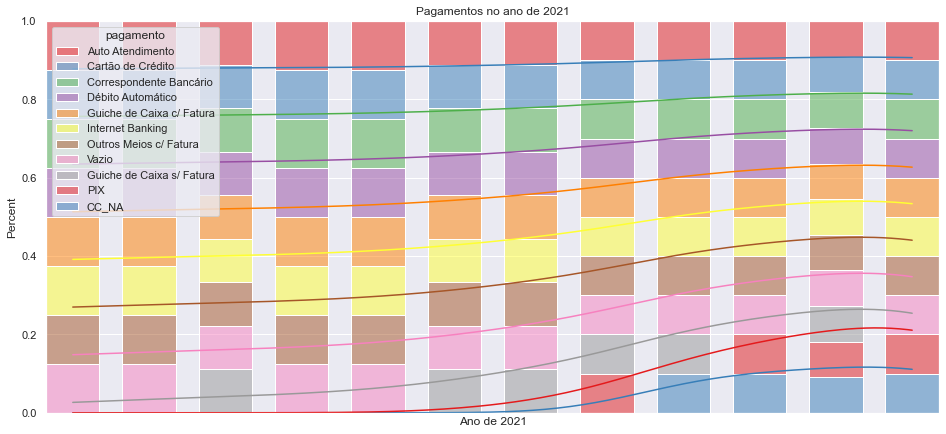

In [32]:
df_plot = df_2021
df_plot['vencimento'] = df_plot.vencimento.apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))

fig = plt.figure(figsize=(16, 8))

#stat ==> ['count', 'frequency', 'density', 'probability', 'proportion', 'percent']
sns.histplot(df_plot, x='vencimento', hue='pagamento', stat='percent', multiple='fill', kde=True,  shrink=.7, palette='Set1')

plt.xlabel("Ano de 2021")
plt.title("Pagamentos no ano de 2021")

plt.gca().xaxis.set_major_locator(dates.DayLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.show()

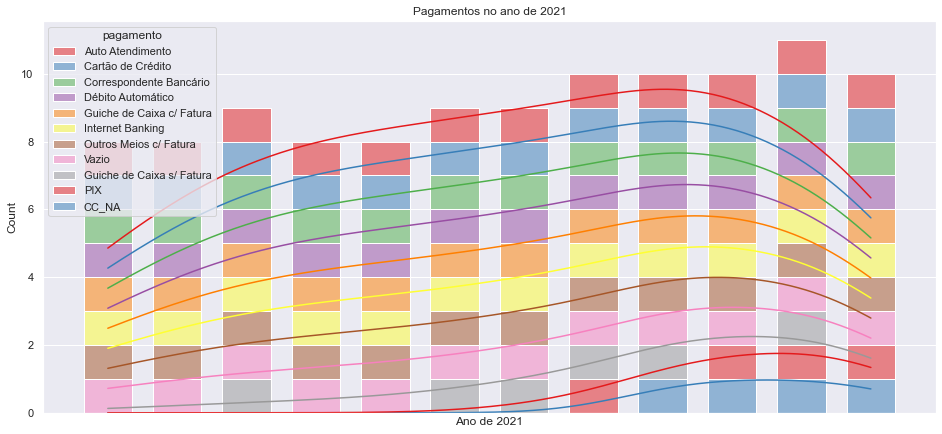

In [33]:
df_plot = df_2021
df_plot['vencimento'] = df_plot.vencimento.apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))

fig = plt.figure(figsize=(16, 8))
sns.histplot(df_plot, x='vencimento', hue='pagamento', multiple='stack', kde=True, shrink=.7, palette='Set1')

plt.xlabel("Ano de 2021")
plt.title("Pagamentos no ano de 2021")

plt.gca().xaxis.set_major_locator(dates.DayLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.show()

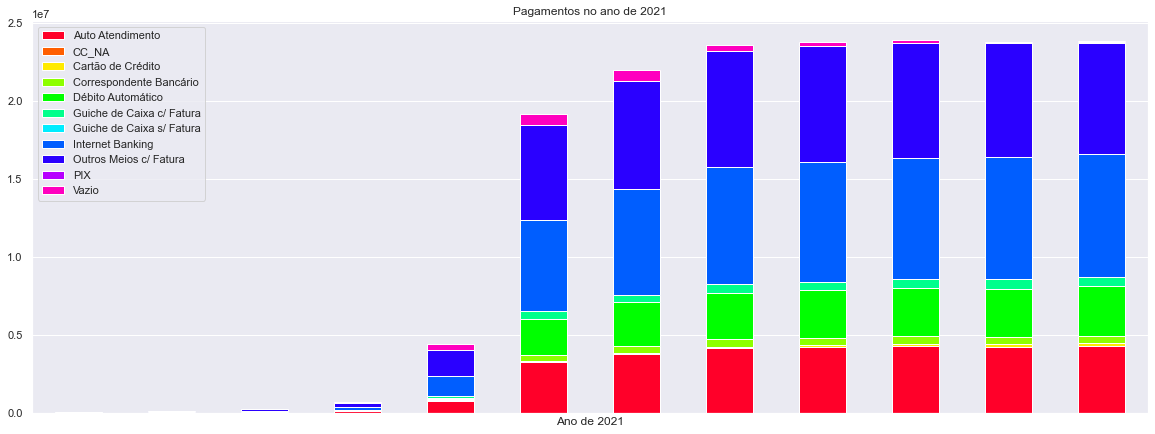

In [46]:
df_plot = df_2021
df_plot['vencimento'] = df_plot.vencimento.apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))
df_plot.groupby(['vencimento', 'pagamento']).sum().unstack().fillna(0).plot(kind='bar', 
                                                                            y='total', 
                                                                            stacked=True, 
                                                                            figsize=(20, 8),
                                                                            colormap='gist_rainbow')

plt.legend()
plt.xlabel("Ano de 2021")
plt.ylabel(None)
plt.title("Pagamentos no ano de 2021")

plt.gca().xaxis.set_major_locator(dates.DayLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.show()

In [35]:
df_plot = df_2021
df_plot['vencimento'] = df_plot.vencimento.apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))
df_plot = df_plot.groupby(['vencimento', 'pagamento']).sum().unstack().fillna(0)
df_plot.columns

MultiIndex([('total',          'Auto Atendimento'),
            ('total',                     'CC_NA'),
            ('total',         'Cartão de Crédito'),
            ('total',   'Correspondente Bancário'),
            ('total',         'Débito Automático'),
            ('total', 'Guiche de Caixa c/ Fatura'),
            ('total', 'Guiche de Caixa s/ Fatura'),
            ('total',          'Internet Banking'),
            ('total',    'Outros Meios c/ Fatura'),
            ('total',                       'PIX'),
            ('total',                     'Vazio')],
           names=[None, 'pagamento'])

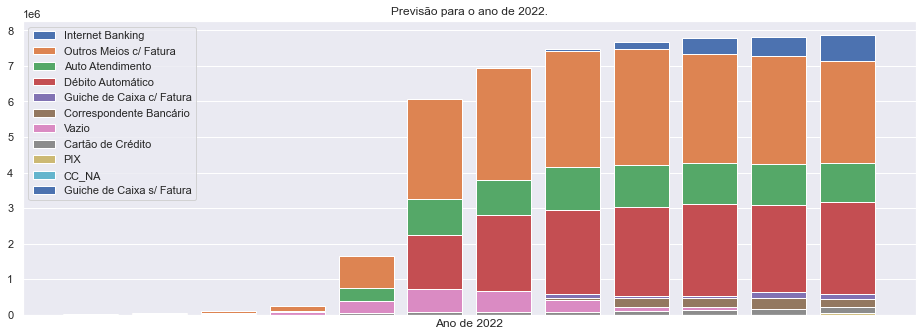

In [36]:
df_plot = df_2021
df_plot['vencimento'] = df_plot.vencimento.apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))
df_plot = df_plot.groupby(['vencimento', 'pagamento']).sum().unstack().fillna(0)

fig = plt.figure(figsize=(16, 6))

x = df_plot.index
y1 = df_plot[('total', 'Internet Banking')]
y2 = df_plot[('total', 'Outros Meios c/ Fatura')]
y3 = df_plot[('total', 'Auto Atendimento')]
y4 = df_plot[('total', 'Débito Automático')]
y5 = df_plot[('total', 'Guiche de Caixa c/ Fatura')]
y6 = df_plot[('total', 'Correspondente Bancário')]
y7 = df_plot[('total', 'Vazio')]
y8 = df_plot[('total', 'Cartão de Crédito')]
y9 = df_plot[('total', 'PIX')]
y10 = df_plot[('total', 'CC_NA')]
y11 = df_plot[('total', 'Guiche de Caixa s/ Fatura')]


plt.bar(x, y1, label='Internet Banking')
plt.bar(x, y2, label='Outros Meios c/ Fatura')
plt.bar(x, y3, label='Auto Atendimento')
plt.bar(x, y4, label='Débito Automático')
plt.bar(x, y5, label='Guiche de Caixa c/ Fatura')
plt.bar(x, y6, label='Correspondente Bancário')
plt.bar(x, y7, label='Vazio')
plt.bar(x, y8, label='Cartão de Crédito')
plt.bar(x, y9, label='PIX')
plt.bar(x, y10, label='CC_NA')
plt.bar(x, y11, label='Guiche de Caixa s/ Fatura')

plt.legend()
plt.xlabel("Ano de 2022")
plt.ylabel(None)
plt.title("Previsão para o ano de 2022.")

plt.gca().xaxis.set_major_locator(dates.DayLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.show()